In [30]:
import pandas as pd

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
dp = pd.read_csv("newinjuryData.csv")

In [33]:
dp = dp.drop(columns=['Unnamed: 0'])

In [34]:
dp.to_csv('data.csv')

In [35]:
col_names = ['Skill Level','Injured Before','Age', 'Gender', 'Activity', 'Injury type']

In [36]:
classTree = pd.read_csv("data.csv", header=None, names=col_names)

In [37]:
classTree = classTree.iloc[1: , :]

In [38]:
labelencoder = LabelEncoder()
classTree['Gender'] = labelencoder.fit_transform(classTree['Gender'])
classTree['Skill Level'] = labelencoder.fit_transform(classTree['Skill Level'])
classTree['Injured Before'] = labelencoder.fit_transform(classTree['Injured Before'])
classTree['Activity'] = labelencoder.fit_transform(classTree['Activity'])
classTree['Age'] = labelencoder.fit_transform(classTree['Age'])
classTree['Injury type'] = labelencoder.fit_transform(classTree['Injury type'])

In [39]:
classTree

,Skill Level,Injured Before,Age,Gender,Activity,Injury type
0.0,2,0,2,0,4,0
1.0,2,0,4,0,9,3
2.0,0,0,1,0,0,0
3.0,1,1,1,1,8,1
4.0,1,1,3,1,7,0
...,...,...,...,...,...,...
9995.0,2,1,1,1,11,4
9996.0,1,0,3,0,2,3
9997.0,2,1,3,0,1,4
9998.0,0,0,0,1,1,3


In [40]:
feature_cols = ['Skill Level','Injured Before','Age','Gender','Activity']
target_cols = ['Injury type']
X = classTree[feature_cols]
y = classTree[target_cols]

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logreg = LogisticRegression()

In [44]:
logreg.fit(X_train,y_train.values.reshape(-1,))

LogisticRegression()

In [45]:
y_pred=logreg.predict(X_test)

In [46]:
from sklearn import metrics

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2072


In [48]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [49]:
#I used this to draw the confusion matrix
#https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/#:~:text=The%20confusion%20matrix%20is%20a,an

In [50]:
cm = confusion_matrix(y_test, y_pred)

In [51]:
cm_df = pd.DataFrame(cm,
                     index = ['Lower Back Pain','Plantar Fasciitis','Shin Splints','Sprains','Strains'], 
                     columns = ['Lower Back Pain','Plantar Fasciitis','Shin Splints','Sprains','Strains'])

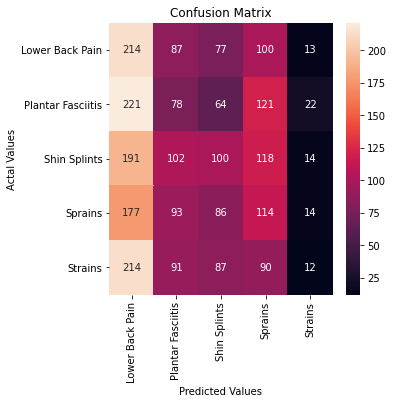

In [52]:
#Plotting the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True,fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()